# Imports

In [29]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [30]:
items = [
    {
        "name":"a",
        "w": 2,
        "v": 10
    },
    {
        "name":"b",
        "w": 3,
        "v": 5
    },
    {
        "name":"c",
        "w": 5,
        "v": 15
    },
    {
        "name":"d",
        "w": 7,
        "v": 7
    },
    {
        "name":"e",
        "w": 1,
        "v": 6
    },
    {
        "name":"f",
        "w": 4,
        "v": 18
    },
    {
        "name":"g",
        "w": 1,
        "v": 3
    }
]

items = []

for i in range(100):
    items.append({
        "name": "p",
        "v": random.randint(1,20),
        "w": random.randint(1,10)
    })

MAX_W = 300

POPULATION_SIZE = 200
MUTATION_RATE = 0.8
EPOCH = 200

In [31]:
class DNA:
    def __init__(self, max_w, items, mutationRate):
        self.length = len(items)
        self.max_w = max_w
        self.total_weight = 0
        self.items = items
        self.mutationRate = mutationRate

        self.genes = []
        for i in range(self.length):
            self.genes.append(random.randint(0,1))
    
    def crossover(self, parent):
        child = DNA(self.max_w, self.items, self.mutationRate)
        n_b2 = self.length // 2
        child.genes = self.genes[:n_b2] + parent.genes[n_b2:]
        return child

    def mutate (self):
        if random.random() < self.mutationRate:
            index = random.randint(0, len(self.genes) - 1)
            if self.genes[index]:
                self.genes[index] = 0
            else:
                self.genes[index] = 1

    def calcFitness(self):
        self.total_weight = 0
        total_value = 0
        index = 0
        for i in self.genes:
            if i:
                self.total_weight += items[index]["w"]
                total_value += items[index]["v"]
            index += 1
        self.value = total_value
        if self.total_weight>self.max_w:
            self.value = 0
        self.w_d = abs(self.max_w - self.total_weight) 




In [32]:
class Population :
    def __init__(self, pop_size, max_w, items, mutationRate):
        self.pop_size = pop_size
        self.max_w = max_w
        self.items = items
        self.mutationRate = mutationRate

        self.population = []
        for i in range(pop_size):
            self.population.append(DNA(self.max_w, self.items, self.mutationRate))
    
    def generate(self):
        for i in range(0, self.pop_size, 2):
            parentA = self.population[i]
            parentB = self.population[i+1]
            child1 = parentA.crossover(parentB)
            child1.mutate()
            child2 = parentB.crossover(parentA)
            child2.mutate()
            self.population.append(child1)
            self.population.append(child2)
    
    def calcFitness(self):
        for i in self.population:
            i.calcFitness()
    
    def selector(self):
        sortend_list = sorted(self.population, key=lambda x: (-x.value, x.w_d))

        self.population = sortend_list

    def kill(self):
        self.population = self.population[:self.pop_size]


In [33]:
myPOP = Population(POPULATION_SIZE, MAX_W, items, MUTATION_RATE)

In [34]:
best_values = []
best_weight = []
index = 0

while EPOCH:
    myPOP.generate()
    myPOP.calcFitness()
    myPOP.selector()
    myPOP.kill()
    
    index += 1

    best_values.append(myPOP.population[0].value)

    EPOCH -= 1



############################################
best genes  : [1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
best value  : 867
total weight: 300
############################################


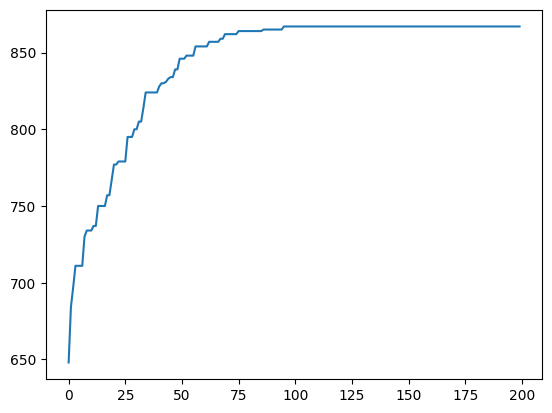

top 20 :

[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] 0 867 300
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] 0 867 300
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] 0 867 300
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [35]:
print("############################################")


print("best genes  : ", end="")
print(myPOP.population[0].genes)

print("best value  : ", end="")
print(myPOP.population[0].value)

print("total weight: ", end="")
print(myPOP.population[0].total_weight)

print("############################################")

plt.plot(np.arange(index), best_values)
plt.show()

print("top 20 :", end="\n\n")

for i in myPOP.population[:20]:
    print(i.genes, end=" ")
    print(i.w_d, end=" ")
    print(i.value, end=" ")
    print(i.total_weight)

